In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch import optim
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from functools import reduce
from itertools import chain
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from src.datasets import get_train, get_assessment, get_text
from src.phrase import get_all_phrases
from src.embedding import word2vec, rubert, muse
from src.processing import tokenize, lemmatize, stringify, flatten
from src.plot import plot_distribution
from tqdm import tqdm

In [2]:
competence_columns = pd.Index([
    "готовность к изменениям",
    "Самоорганизация и самоактуализация",
    "мотивация"
])

In [3]:
df = pd.read_pickle("dataset_01.pickle")
df = df.sample(frac=1)

In [4]:
df = get_train(columns=competence_columns, embeddings=[word2vec, rubert, muse])

Downloading: 100%|██████████| 642/642 [00:00<00:00, 408kB/s]
Downloading: 100%|██████████| 1.65M/1.65M [00:03<00:00, 528kB/s] 
Downloading: 100%|██████████| 112/112 [00:00<00:00, 50.1kB/s]
Downloading: 100%|██████████| 24.0/24.0 [00:00<00:00, 17.1kB/s]
Downloading: 100%|██████████| 711M/711M [16:15<00:00, 729kB/s] 


готовность к изменениям word2vec - tab:blue
Самоорганизация и самоактуализация word2vec - tab:orange
мотивация word2vec - tab:green


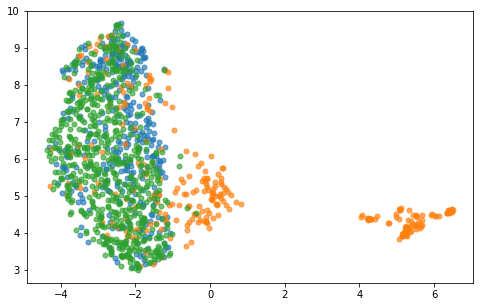

In [5]:
plt.figure(figsize=(8, 5))
plot_distribution(df[competence_columns + ' word2vec'], reducer=UMAP(n_neighbors=50, metric='cosine'), alpha=0.66, size=25
)

/home/akkyma/anaconda3/envs/intan/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
готовность к изменениям word2vec - tab:blue
Самоорганизация и самоактуализация word2vec - tab:orange
мотивация word2vec - tab:green


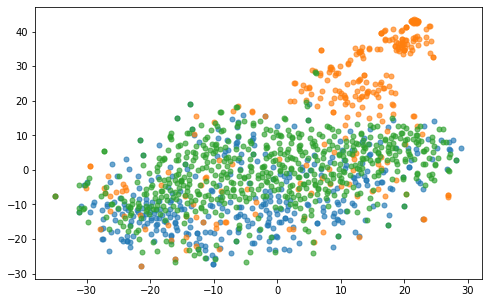

In [6]:
plt.figure(figsize=(8, 5))
plot_distribution(df[competence_columns + ' word2vec'], alpha=0.66,size=25)

готовность к изменениям rubert - tab:blue
Самоорганизация и самоактуализация rubert - tab:orange
мотивация rubert - tab:green


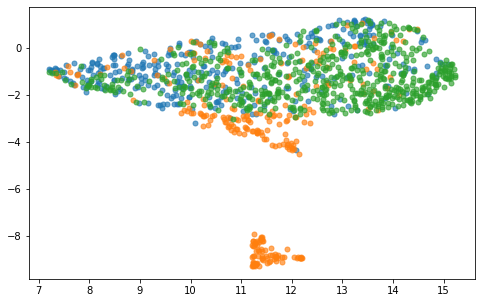

In [9]:
plt.figure(figsize=(8, 5))
plot_distribution(df[competence_columns + ' rubert'], alpha=0.66, size=25, 
    reducer=UMAP(n_neighbors=50, metric='cosine'))

/home/akkyma/anaconda3/envs/intan/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
готовность к изменениям rubert - tab:blue
Самоорганизация и самоактуализация rubert - tab:orange
мотивация rubert - tab:green


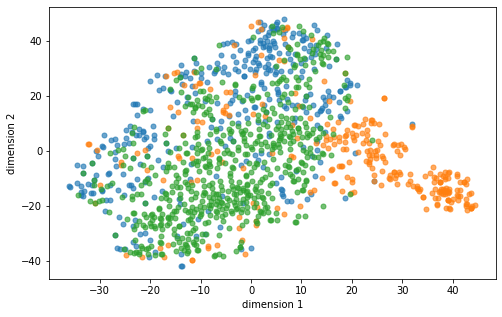

In [15]:
plt.figure(figsize=(8, 5))
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plot_distribution(df[competence_columns + ' rubert'], alpha=0.66, size=25)
plt.savefig("rubert2.jpg")

готовность к изменениям muse - tab:blue
Самоорганизация и самоактуализация muse - tab:orange
мотивация muse - tab:green


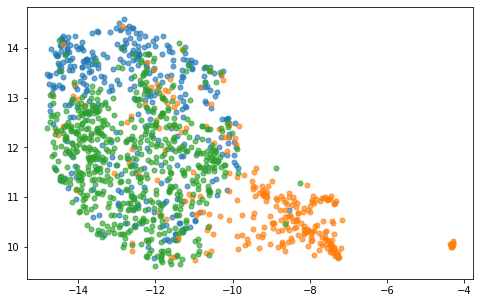

In [7]:
plt.figure(figsize=(8, 5))
plot_distribution(df[competence_columns + ' muse'], alpha=0.66, size=25, 
    reducer=UMAP(n_neighbors=50, metric='cosine'))

/home/akkyma/anaconda3/envs/intan/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
готовность к изменениям muse - tab:blue
Самоорганизация и самоактуализация muse - tab:orange
мотивация muse - tab:green


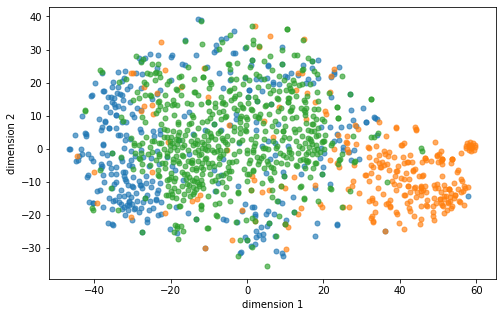

In [14]:
plt.figure(figsize=(8, 5))
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plot_distribution(df[competence_columns + ' muse'], alpha=0.66, size=25)
plt.savefig('muse.jpg')

In [ ]:
from matplotlib import colors

def plot_list(vals, reducer=TSNE(metric='cosine'), alpha=1, size=10):
    full_data = []
    for val in vals:
        full_data.extend( val )
    full_data = np.array(full_data)
    # full_data = reducer.fit_transform(full_data)

    current_data_index = 0
    color_names = list(colors.TABLEAU_COLORS.keys())
    color_values = list(colors.TABLEAU_COLORS.values())    
    for i, val in enumerate(vals):
        color_index = i % len(color_names)
        print(f"{i} - {color_names[color_index]}")
        data = full_data[current_data_index : current_data_index+len(val)]
        current_data_index += len(val)
        plt.scatter(data[:,0], data[:, 1], edgecolors=color_values[color_index], alpha = alpha, s=size)

In [ ]:
plt.figure(figsize=(8, 5))
plot_list(transformed, alpha=0.66, size=25)

In [4]:
split_index = int(0.9 * len(df))
train_df, test_df = df[:split_index], df[split_index:]

In [5]:
class Model:
    def predict():
        pass
    def predict_proba():
        pass
    def find_most_probable():
        pass

In [6]:
class ModelEmbeddingInner(Model):
    def __init__(self, competences_embeddings):
        self.competences_embeddings = competences_embeddings
        
    def __predict_single(self, embedding):
        scores = [max([ emb @ embedding if emb is not None else 0 for emb in embeddings ]) 
            for embeddings in self.competences_embeddings]
        return np.argmax(scores)

    def predict(self, embeddings):
        return np.array([ self.__predict_single(embedding) for embedding in embeddings ])
    
    def __predict_proba_single(self, embedding):
        scores = [max([ emb @ embedding if emb is not None else 0 for emb in embeddings ]) 
            for embeddings in self.competences_embeddings]
        return scores

    def predict_proba(self, embeddings):
        return np.array([ self.__predict_proba_single(embedding) for embedding in embeddings ])
    
    def find_most_probable(self, embeddings, topk=1):
        phrases_scores = self.predict_proba(embeddings)
        indices = phrases_scores.argsort(axis=0)[-topk:]
        return indices, [ phrases_scores[indices[i]][i] for i in range(phrases_scores.shape[1]) ]

In [7]:
class ModelCompose(Model):
    def __init__(self, model, competences_embeddings, balanced_weight_bias=None, reducer=None):
        self.model = model
        self.reducer = reducer
        X = []
        Y = []
        for label_index, competence_embeddings in enumerate(competences_embeddings):
            X.extend(competence_embeddings)
            Y.extend([label_index] * len(competence_embeddings))
        if reducer is not None:
            X = reducer.fit_transform(X)

        if balanced_weight_bias is not None:
            balanced_weight_bias = np.array(balanced_weight_bias)
            balanced_weight_bias = balanced_weight_bias / (sum(balanced_weight_bias) / len(balanced_weight_bias))
            weights = len(Y) / (len(competences_embeddings) * np.bincount(Y))
            weights *= balanced_weight_bias
            self.model.set_params(class_weight={ label: val for label, val in enumerate(weights) })

        self.model.fit(X, Y)

    def predict(self, embeddings):
        if self.reducer is not None:
            embeddings = self.reducer.transform(embeddings)
        predictions = self.model.predict(embeddings)
        return predictions

    def predict_proba(self, embeddings):
        if self.reducer is not None:
            embeddings = self.reducer.transform(embeddings)
        scores = self.model.predict_proba(embeddings)
        return scores

    def find_most_probable(self, embeddings, topk=1):
        phrases_scores = self.predict_proba(embeddings)
        indices = phrases_scores.argsort(axis=0)[-topk:]
        result_scores = np.array([ phrases_scores[indices[:, i], i] for i in range(phrases_scores.shape[1]) ]).T
        return indices, result_scores

In [8]:
class ModelDL(Model):

    class InnerModel(nn.Module):
        def __init__(self, input_size, output_size, hidden_size, weight=None, lr=0.1, weight_decay=None):
            super().__init__()
            self.linear1 = nn.Linear(input_size, hidden_size)
            self.linear2 = nn.Linear(hidden_size, output_size)
            self.loss = nn.CrossEntropyLoss(weight=weight)
            self.softmax = nn.Softmax(dim=-1)
            self.optimizer = optim.SGD(self.parameters(), lr=lr, weight_decay=weight_decay)
        
        def forward(self, X):
            X = self.linear1(X)
            X = self.linear2(X)
            X = self.softmax(X)
            return X

        def train(self, X, Y, iterations):
            device = torch.device('cuda')
            self.to(device)
            X = torch.Tensor(X).to(device)
            Y = torch.Tensor(Y).long().to(device)
            for i in range(iterations):
                self.optimizer.zero_grad()
                batch_size=16384
                loss_total = 0
                for start_index in range(0, len(Y), batch_size):
                    output = self.forward(X[start_index: start_index + batch_size])
                    loss = self.loss(output, Y[start_index: start_index + batch_size])
                    loss_total += loss.item()
                    loss.backward()
                self.optimizer.step()
            self.to('cpu')
            print("Loss: ", loss_total)

    def __init__(self, hidden_size, competences_embeddings, iterations=1000, lr=0.1, weight_decay=0):
        X = []
        Y = []
        for label_index, competence_embeddings in enumerate(competences_embeddings):
            X.extend(competence_embeddings)
            Y.extend([label_index] * len(competence_embeddings))
        
        weight = torch.Tensor( len(Y) / (len(competences_embeddings) * np.bincount(Y)) )
        self.model = self.InnerModel(len(X[0]), len(competences_embeddings), hidden_size, weight=weight, lr=lr, weight_decay=weight_decay)
        self.model.train(X, Y, iterations)

    def predict(self, embeddings):
        embeddings = torch.Tensor(embeddings)
        scores = self.model(embeddings)
        return torch.argmax(scores, axis=1).detach().numpy()

    def predict_proba(self, embeddings):
        embeddings = torch.Tensor(embeddings)
        scores = self.model(embeddings)
        return scores.detach().numpy()

    def find_most_probable(self, embeddings, topk=1):
        phrases_scores = self.predict_proba(embeddings)
        indices = phrases_scores.argsort(axis=0)[-topk:]
        result_scores = np.array([ phrases_scores[indices[:, i], i] for i in range(phrases_scores.shape[1]) ]).T
        return indices, result_scores

In [9]:
class ModelIntersection(Model):
    def __init__(self, competences_phrases):
        self.competences_phrases_tokens = [[ lemmatize(tokenize( phrase ))
            for phrase in competence_phrases]
            for competence_phrases in competences_phrases ]
    
    def predict(self, phrases):
        return np.argmax(self.predict_proba(phrases), axis=1)

    def predict_proba(self, phrases):
        scores = []
        for phrase in phrases:
            phrase = lemmatize(tokenize( phrase ))
            scores.append([
                max([ intersection_score(competence_phrase_tokens, phrase) for competence_phrase_tokens in competence_phrases_tokens ])
                for competence_phrases_tokens in self.competences_phrases_tokens
            ])
        return np.array(scores)

    def find_most_probable(self, phrases, topk=1):
        phrases_scores = self.predict_proba(phrases)
        indices = phrases_scores.argsort(axis=0)[-topk:]
        return indices, phrases_scores[indices]

In [16]:
embedding_name = 'muse'
competence_index = 2

train_embeddings = [ train_df[column].dropna().tolist() for column in competence_columns + ' ' + embedding_name ]
train_embeddings.append([ embedding
    for embeddings in train_df[f'phrases {embedding_name}'] if embeddings is not None
    for embedding in embeddings if embedding is not None
])

test_embeddings = [ test_df[column].dropna().tolist() for column in competence_columns + ' ' + embedding_name ]
test_embeddings.append([ embedding
    for embeddings in test_df[f'phrases {embedding_name}'] if embeddings is not None
    for embedding in embeddings if embedding is not None
])

train_embeddings_cut = [train_df[competence_columns[competence_index] + ' ' + embedding_name].dropna().tolist()]
train_embeddings_cut.append([ embedding
    for embeddings in train_df[f'phrases {embedding_name}'] if embeddings is not None
    for embedding in embeddings if embedding is not None
])

test_embeddings_cut = [test_df[competence_columns[competence_index] + ' ' + embedding_name].dropna().tolist()]
test_embeddings_cut.append([ embedding
    for embeddings in test_df[f'phrases {embedding_name}'] if embeddings is not None
    for embedding in embeddings if embedding is not None
])

In [18]:
def compare_confusion_matrix(competences_embeddings, *models):
    X = []
    Y = []
    for label_index, competence_embeddings in enumerate(competences_embeddings):
        X.extend(competence_embeddings)
        Y.extend([label_index] * len(competence_embeddings))
    X, Y = np.array(X), np.array(Y)
    for i, model in enumerate(models):
        print(f"model {i}")
        pred = model.predict(X)
        print(confusion_matrix(Y, pred))

In [17]:
def compare_phrases(target_label_index, target_phrase_list, phrases_list, phrase_embeddings_list, *models):
    for target_phrase, phrases, embeddings in zip(target_phrase_list, phrases_list, phrase_embeddings_list):
        if target_phrase is None:
            continue
        print(target_phrase)
        for i, model in enumerate(models):
            print(f"model {i}")
            phrase_indexes, phrase_scores = model.find_most_probable(embeddings)
            phrase_indexes, phrase_scores = phrase_indexes[0], phrase_scores[0]
            phrase_index, phrase_score = phrase_indexes[target_label_index], phrase_scores[target_label_index]
            print(phrases[phrase_indexes[target_label_index]], phrase_score)
        print("__________")

In [19]:
def intersection_score(tokens1, tokens2):
    set1 = set(tokens1)
    set2 = set(tokens2)
    return len(set1 & set2) / len(set1 | set2)

def max_intersection_score(tokens1_list, tokens2):
    max_score = 0
    for tokens1 in tokens1_list:
        max_score = max(max_score, intersection_score(tokens1, tokens2))
    return max_score

def compare_intersection(targets_phrase_list, phrases_list, phrase_embeddings_list, *models, topk=1):
    for model_index, model in enumerate(models):
        print(f"model {model_index}")
        for target_index, target_phrase_list in enumerate(targets_phrase_list):
            inter_score = 0
            valid_counter = 0
            for target_phrase, phrases, embeddings in zip(target_phrase_list, phrases_list, phrase_embeddings_list):
                if target_phrase is None or embeddings is None:
                    continue
                valid_counter += 1
                max_score = 0
                phrases_indexes, phrases_scores = model.find_most_probable(embeddings, topk=topk)
                for phrase_indexes, phrase_scores in zip(phrases_indexes, phrases_scores):
                    phrase_index = phrase_indexes[target_index]
                    pred_phrase = phrases[phrase_index]
                    max_score = max(max_score,
                        intersection_score( lemmatize(tokenize(target_phrase)), lemmatize(tokenize(pred_phrase)) )
                    )
                inter_score += max_score
            inter_score /= valid_counter
            print(f"{target_index}:", inter_score)

In [ ]:
model_inner = ModelEmbeddingInner(train_embeddings[:3])

In [34]:
balance = [1, 1]
pca = 10

model_compose_log = ModelCompose(
    SGDClassifier(loss='log', max_iter=10000),
    train_embeddings_cut,
    reducer=PCA(n_components=pca),
    balanced_weight_bias=balance)

model_compose_huber = ModelCompose(
    SGDClassifier(loss='modified_huber'),
    train_embeddings_cut,
    reducer=PCA(n_components=pca),
    balanced_weight_bias=balance)

In [248]:
model_dl = ModelDL(2, train_embeddings[:3], 1000, lr=0.1)

Loss:  0.8632280230522156


In [21]:
compare_confusion_matrix(test_embeddings_cut, model_compose_log, model_compose_huber)

model 0
[[   52     7]
 [ 2166 23467]]
model 1
[[   56     3]
 [ 4235 21398]]


In [ ]:
compare_phrases(competence_index, test_df[competence_columns[competence_index] + ' words'],
    test_df['phrases'].dropna(), test_df[f'phrases {embedding_name}'].dropna(), model_compose_log, model_compose_huber)

In [18]:
import pickle
with open("model.pickle", "rb") as f:
    model = pickle.load(f)

In [22]:
compare_intersection(
    [train_df[column] for column in competence_columns + ' words'],
    train_df['phrases'],
    train_df[f'phrases {embedding_name}'],
    model_compose_log, model_compose_huber,
    topk=1
)

NameError: name 'model' is not defined

In [35]:
compare_intersection(
    [test_df[competence_columns[competence_index] + ' words']],
    test_df['phrases'],
    test_df[f'phrases {embedding_name}'],
    model_compose_log, model_compose_huber,
    topk=1
)

model 0
0: 0.13152536582674337
model 1
0: 0.11339096543313887


In [258]:
competence_column = competence_columns[2]
competence_phrases = df[competence_column + ' words']
phrases_list = df['phrases']
bleu_score = 0
valid_counter = 0
smoothing_function = SmoothingFunction().method1
for phrases, competence_phrase in tqdm(zip(phrases_list, competence_phrases)):
    if competence_phrase is None or phrases is None:
        continue
    phrases = [lemmatize(tokenize(phrase)) for phrase in phrases]
    competence_phrase = lemmatize(tokenize(competence_phrase))
    bleu_score += max([ intersection_score(phrase, competence_phrase) for phrase in phrases ])
    valid_counter += 1
bleu_score /= valid_counter
print(competence_column, bleu_score)

655it [47:10,  4.32s/it]


NameError: name 'competence_column' is not defined